In [1]:
# IMPORT MODULES TO READ DATA
import pandas as pd
import numpy as np

# IMPORT LINEAR MODEL
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression as lm

# Data Visualization
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
# Read DATA
# Since our data is seperated by semicolons we need to do sep=";"
df = pd.read_csv('student-mat.csv',sep =';')

df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [4]:
'''
Trim Data
Relevant Data: G1,G2,G3 = GRADES
Studytime, failures, absences, Dalc(Workday Alcohol Consumption), goout
'''
# Creates Data with these fields
data = df[['G1','G2','G3','studytime','failures','absences','Dalc','goout']]
print(data)

     G1  G2  G3  studytime  failures  absences  Dalc  goout
0     5   6   6          2         0         6     1      4
1     5   5   6          2         0         4     1      3
2     7   8  10          2         3        10     2      2
3    15  14  15          3         0         2     1      2
4     6  10  10          2         0         4     1      2
..   ..  ..  ..        ...       ...       ...   ...    ...
390   9   9   9          2         2        11     4      4
391  14  16  16          1         0         3     3      5
392  10   8   7          1         3         3     3      3
393  11  12  10          1         0         0     3      1
394   8   9   9          1         0         5     3      3

[395 rows x 8 columns]


In [5]:
# Create Lables and Features
# The atribute to predict otherwise known as the labels which is G3

X = np.array(data.drop(['G3'], 1)) # Features
Y = np.array(data['G3']) # Labels

C:\Users\Gnete educada\AppData\Local\Temp/ipykernel_8368/1424128074.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(data.drop(['G3'], 1)) # Features


In [6]:
# Split Data into Train set and Test Set
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.10)

In [7]:
# Train our Model
model = lm()

model.fit(x_train,y_train)

LinearRegression()

In [11]:
# Test Our Model
acc = model.score(x_test, y_test) # acc stands for accuracy 
print(acc)

0.937931667067841


In [12]:
#Prediction
#print('Coefficient: \n', model.coef_)# The slope value
#print('Intercept: \n', model.intercept_) # The intercept

predictions = model.predict(x_test)

# Range is the length of the test set
for x in range(len(predictions)):
    print(f'G3 PREDICTIONS Student {x + 1}: {predictions[x]:.2f}')

G3 PREDICTIONS Student 1: 8.57
G3 PREDICTIONS Student 2: 12.00
G3 PREDICTIONS Student 3: 9.48
G3 PREDICTIONS Student 4: 11.88
G3 PREDICTIONS Student 5: 8.62
G3 PREDICTIONS Student 6: 9.27
G3 PREDICTIONS Student 7: 9.62
G3 PREDICTIONS Student 8: 15.63
G3 PREDICTIONS Student 9: 15.36
G3 PREDICTIONS Student 10: 8.31
G3 PREDICTIONS Student 11: 9.39
G3 PREDICTIONS Student 12: 14.11
G3 PREDICTIONS Student 13: 19.25
G3 PREDICTIONS Student 14: 6.01
G3 PREDICTIONS Student 15: 6.30
G3 PREDICTIONS Student 16: 7.20
G3 PREDICTIONS Student 17: 15.04
G3 PREDICTIONS Student 18: 8.11
G3 PREDICTIONS Student 19: 5.88
G3 PREDICTIONS Student 20: 12.69
G3 PREDICTIONS Student 21: 14.22
G3 PREDICTIONS Student 22: 16.53
G3 PREDICTIONS Student 23: 20.02
G3 PREDICTIONS Student 24: 12.86
G3 PREDICTIONS Student 25: 9.31
G3 PREDICTIONS Student 26: 10.98
G3 PREDICTIONS Student 27: 15.01
G3 PREDICTIONS Student 28: 6.76
G3 PREDICTIONS Student 29: 18.47
G3 PREDICTIONS Student 30: 7.86
G3 PREDICTIONS Student 31: 13.47
G

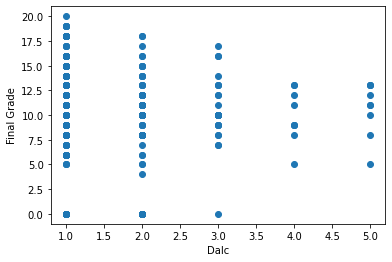

In [13]:
# DATA VISUALIZATION
plot = "Dalc" # Change this to G1, G2, studytime, Dalc, or absences to see other graphs
plt.scatter(data[plot], data["G3"]) 
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

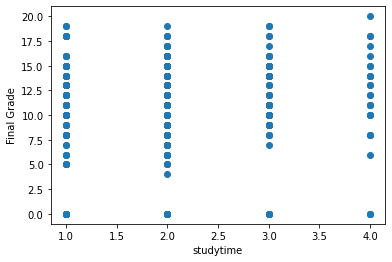

In [14]:
# DATA VISUALIZATION
plot = "studytime" # Change this to G1, G2, studytime, Dalc, or absences to see other graphs
plt.scatter(data[plot], data["G3"]) 
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()